In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/senior_thesis/llm_bar/thetas_llmbar.csv')

In [4]:
data.head()

,Unnamed: 0,Model,IFEval,Big_Bench_Hard,MuSR,Theta
0,0,flan-t5-large,22.01,17.51,9.01,-0.218236
1,1,flan-t5-xl,22.37,22.70,11.33,0.214534
2,2,flan-t5-base,18.91,11.34,3.22,-1.299936
3,3,flan-t5-small,15.24,6.36,10.37,-1.351911
4,4,gemma-1.1-2b-it,30.67,5.86,2.02,-0.525908


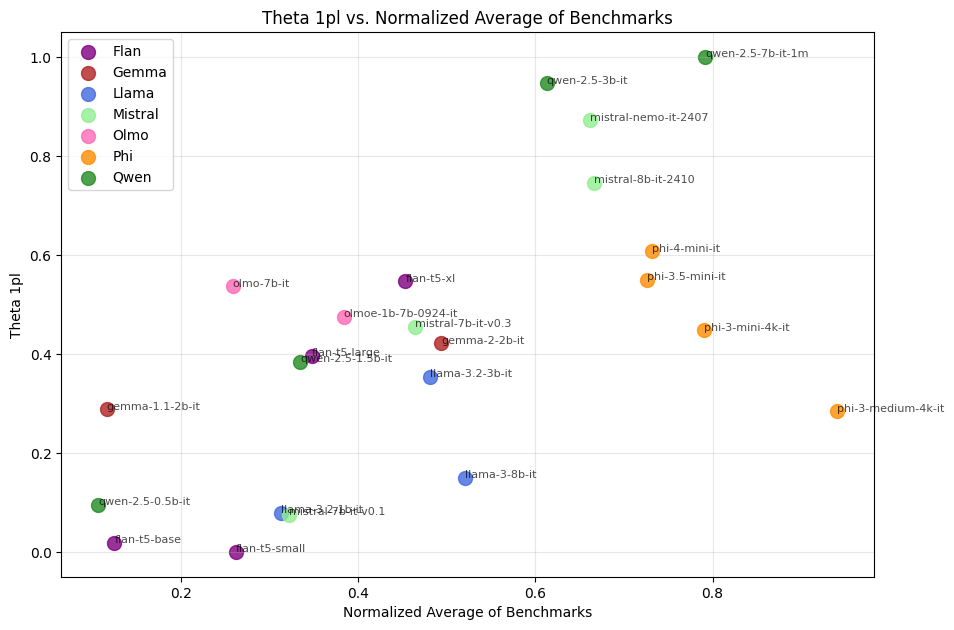

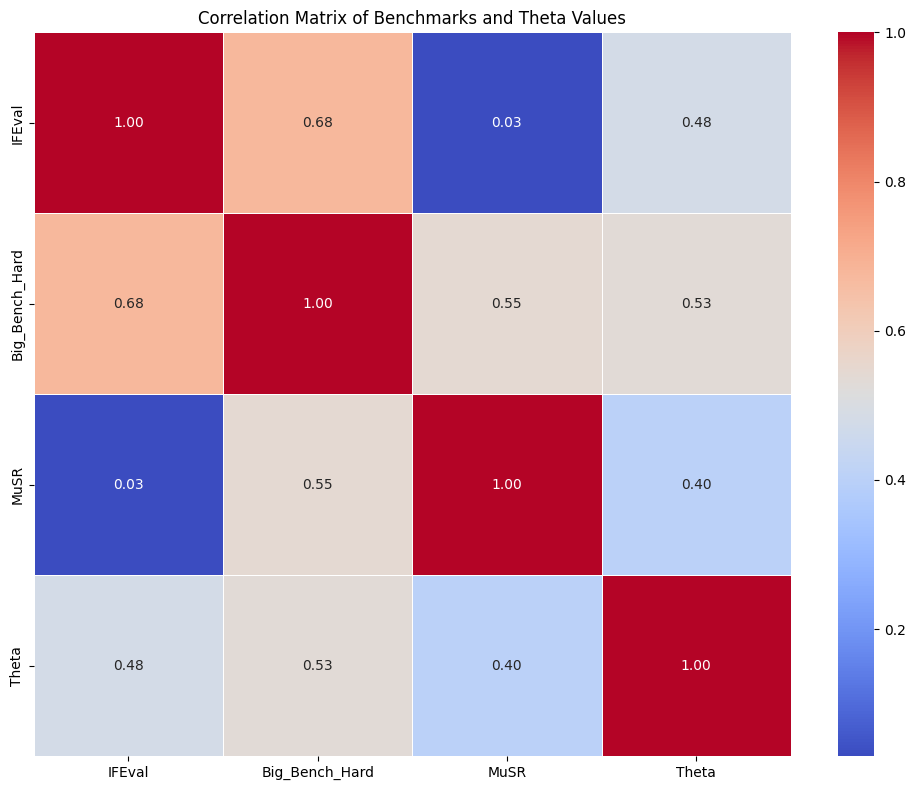

Correlation Analysis:

Theta correlations:
  with IFEval: r = 0.4803, p-value = 0.0204
  with Big_Bench_Hard: r = 0.5321, p-value = 0.0090
  with MuSR: r = 0.4040, p-value = 0.0559
  with Avg_Norm_Benchmark: r = 0.6063, p-value = 0.0022


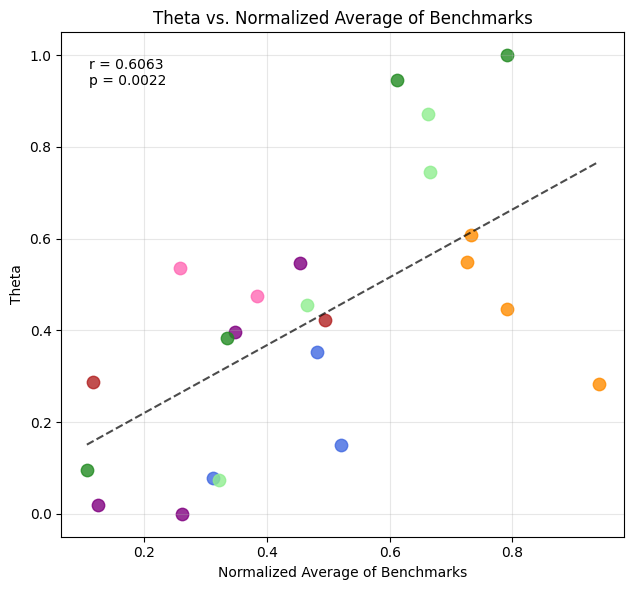


Summary Table:
               Model  IFEval  Big_Bench_Hard  MuSR  Avg_Norm_Benchmark    Theta
  phi-3-medium-4k-it   64.23           49.38 13.05            0.940409 0.283789
   qwen-2.5-7b-it-1m   74.48           35.03  9.52            0.791567 1.000000
    phi-3-mini-4k-it   54.77           36.56 13.12            0.790903 0.447367
       phi-4-mini-it   73.78           38.74  6.45            0.732026 0.607355
     phi-3.5-mini-it   57.75           36.75 10.10            0.726477 0.550178
  mistral-8b-it-2410   58.96           25.82 10.72            0.666537 0.744743
mistral-nemo-it-2407   63.80           29.68  8.48            0.662033 0.871881
      qwen-2.5-3b-it   64.75           25.80  7.57            0.612756 0.946419
       llama-3-8b-it   74.08           28.24  1.60            0.520560 0.149523
       gemma-2-2b-it   56.68           17.98  7.08            0.494042 0.421602
     llama-3.2-3b-it   73.93           24.06  1.37            0.481406 0.353762
  mistral-7b-it-v0.3   5

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data)

# Calculate the normalized average of benchmarks (IFEval, Big_Bench_Hard, MuSR)
# First, normalize each benchmark column independently
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df['IFEval_norm'] = min_max_normalize(df['IFEval'])
df['Big_Bench_Hard_norm'] = min_max_normalize(df['Big_Bench_Hard'])
df['MuSR_norm'] = min_max_normalize(df['MuSR'])

# Calculate the average of normalized benchmarks
df['Avg_Norm_Benchmark'] = (df['IFEval_norm'] + df['Big_Bench_Hard_norm'] + df['MuSR_norm']) / 3

# Normalize the theta columns as well (optional, but helps for visualization)
# df['Theta_GRM_norm'] = min_max_normalize(df['Theta_GRM'])
# df['Theta_2pl_norm'] = min_max_normalize(df['Theta_2pl'])
# df['Theta_1pl_norm'] = min_max_normalize(df['Theta_1pl'])
df['Theta'] = min_max_normalize(df['Theta'])

# Create a plot with multiple subplots for each theta vs the average benchmark
plt.figure(figsize=(18, 12))

# Setup a color palette based on model families
def get_model_family(model_name):
    if 'llama' in model_name.lower():
        return 'Llama'
    elif 'qwen' in model_name.lower():
        return 'Qwen'
    elif 'gemma' in model_name.lower():
        return 'Gemma'
    elif 'phi' in model_name.lower():
        return 'Phi'
    elif 'flan' in model_name.lower():
        return 'Flan'
    elif 'gpt' in model_name.lower():
        return 'GPT'
    elif 'mistral' in model_name.lower():
        return 'Mistral'
    elif 'flan' in model_name.lower():
        return 'Flan'
    elif 'olmo' in model_name.lower():
        return 'Olmo'
    else:
        return 'Other'

df['Model_Family'] = df['Model'].apply(get_model_family)
family_colors = {'Llama': 'royalblue', 'Qwen': 'forestgreen', 'Gemma': 'firebrick',
                 'Phi': 'darkorange', 'Flan': 'purple', 'GPT': 'red', 'Olmo':'hotpink',
                 'Mistral':'lightgreen', 'Other': 'gray'}

# # Subplot 1: Theta GRM vs Average Benchmark
# plt.subplot(2, 2, 1)
# for family in df['Model_Family'].unique():
#     family_df = df[df['Model_Family'] == family]
#     plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta_GRM'],
#                 label=family, color=family_colors[family], s=100, alpha=0.8)

# for i, row in df.iterrows():
#     plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta_GRM']),
#                 fontsize=8, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta GRM')
# plt.title('Theta GRM vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

# # Subplot 2: Theta 2pl vs Average Benchmark
# plt.subplot(2, 2, 2)
# for family in df['Model_Family'].unique():
#     family_df = df[df['Model_Family'] == family]
#     plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta_2pl'],
#                 label=family, color=family_colors[family], s=100, alpha=0.8)

# for i, row in df.iterrows():
#     plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta_2pl']),
#                 fontsize=8, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta 2pl')
# plt.title('Theta 2pl vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

# Subplot 3: Theta 1pl vs Average Benchmark
plt.subplot(2, 2, 3)
for family in df['Model_Family'].unique():
    family_df = df[df['Model_Family'] == family]
    plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta'],
                label=family, color=family_colors[family], s=100, alpha=0.8)

for i, row in df.iterrows():
    plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta']),
                fontsize=8, alpha=0.7)

plt.xlabel('Normalized Average of Benchmarks')
plt.ylabel('Theta 1pl')
plt.title('Theta 1pl vs. Normalized Average of Benchmarks')
plt.grid(True, alpha=0.3)
plt.legend()

# # Subplot 4: All Thetas vs Average Benchmark (combined view)
# plt.subplot(2, 2, 4)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_GRM'], label='Theta GRM', marker='o', s=80, alpha=0.7)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_2pl'], label='Theta 2pl', marker='^', s=80, alpha=0.7)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_1pl'], label='Theta 1pl', marker='s', s=80, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta Values')
# plt.title('All Theta Values vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

plt.tight_layout()
plt.savefig('model_thetas_vs_benchmarks.png', dpi=300)
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_columns = ['IFEval', 'Big_Bench_Hard', 'MuSR', 'Theta']
correlation_matrix = df[correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Benchmarks and Theta Values')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

# Let's also look at the numerical relationship by calculating linear regression
from scipy import stats

# Print correlation coefficients and p-values
print("Correlation Analysis:")
for theta in ['Theta']:
    print(f"\n{theta} correlations:")
    for benchmark in ['IFEval', 'Big_Bench_Hard', 'MuSR', 'Avg_Norm_Benchmark']:
        corr, p_value = stats.pearsonr(df[benchmark], df[theta])
        print(f"  with {benchmark}: r = {corr:.4f}, p-value = {p_value:.4f}")

# Scatterplot with regression line for each theta vs the average benchmark
plt.figure(figsize=(18, 6))

thetas = ['Theta']
# thetas = ['Theta_GRM', 'Theta_2pl', 'Theta_1pl']
for i, theta in enumerate(thetas, 1):
    plt.subplot(1, 3, i)

    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Avg_Norm_Benchmark'], df[theta])
    x = np.linspace(df['Avg_Norm_Benchmark'].min(), df['Avg_Norm_Benchmark'].max(), 100)
    y = slope * x + intercept

    # Plot points by model family
    for family in df['Model_Family'].unique():
        family_df = df[df['Model_Family'] == family]
        plt.scatter(family_df['Avg_Norm_Benchmark'], family_df[theta],
                   label=family, color=family_colors[family], s=80, alpha=0.8)

    plt.plot(x, y, 'k--', alpha=0.7)
    plt.text(0.05, 0.95, f'r = {r_value:.4f}\np = {p_value:.4f}',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.xlabel('Normalized Average of Benchmarks')
    plt.ylabel(theta)
    plt.title(f'{theta} vs. Normalized Average of Benchmarks')
    plt.grid(True, alpha=0.3)

    if i == 3:  # Only show legend for the last plot to save space
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('regression_analysis.png', dpi=300)
plt.show()

# Print the summary table
print("\nSummary Table:")
summary_df = df[['Model', 'IFEval', 'Big_Bench_Hard', 'MuSR', 'Avg_Norm_Benchmark',
                 'Theta']].copy()
summary_df = summary_df.sort_values('Avg_Norm_Benchmark', ascending=False)
print(summary_df.to_string(index=False))

#meow


In [6]:
def prepare_grm_data(llm_dataframes, ground_truth_df):
    """
    Prepares data for graded response IRT analysis by comparing student
    grades to ground truth across multiple rubric categories.
    """
    categories = ['overall', 'cohesion', 'syntax', 'vocabulary', 'phraseology',
                 'grammar', 'conventions']

    category_dataframes = {}

    for category in categories:
        category_data = pd.DataFrame(index=ground_truth_df.index)
        category_data['essay_id'] = ground_truth_df['text_id_kaggle']
        category_data['ground_truth'] = ground_truth_df[category]


        for name, df in llm_dataframes.items():
            aligned_responses = []

            for id in ground_truth_df['text_id_kaggle']:
                try:
                    # Get ground truth grade
                    true_grade = ground_truth_df.loc[ground_truth_df['text_id_kaggle'] == id, category].values[0]

                    # Get LLM grade with better numeric handling
                    llm_grade = df.loc[df['essay_id'] == id, category].values[0]

                    # Convert to float first to handle decimals
                    try:
                        llm_grade = float(llm_grade)
                        # # If you need integers, round it
                        # if category in ['overall']:  # Add categories that should be integers
                        #     llm_grade = round(llm_grade)
                    except (ValueError, TypeError):
                        print(f"Warning: Invalid grade value '{llm_grade}' for {id}, defaulting to 3")
                        llm_grade = 3

                    response = llm_grade
                    aligned_responses.append(response)

                except IndexError:
                    print(f"Warning: Missing data for essay_id {id}, defaulting to middle response")
                    aligned_responses.append(3)  # or whatever your middle response value should be
                except Exception as e:
                    print(f"Error processing essay {id}: {e}")
                    aligned_responses.append(3)

            category_data[name] = aligned_responses

        category_dataframes[category] = category_data

    return category_dataframes

In [7]:
import glob
path = '/content/drive/MyDrive/senior_thesis/final_outputs'
csv_files = [file for file in glob.glob(f'{path}/*.csv')]


## we also want to get a list of common ids in case of nans, etc etc-- and to take it out of the ground truth set

common_ids = pd.DataFrame(columns=['essay_id'])
llm_dfs ={}
for file in csv_files:
    df = pd.read_csv(file)
    df.dropna(inplace=True)
    if common_ids.empty:
        common_ids['essay_id'] = df['essay_id']
    else:
      common_ids = pd.merge(common_ids, df['essay_id'], on=['essay_id'], how='inner')
    file_name = file.split('/')[-1]
    file_name = file_name[:-4]
    llm_dfs[file_name] = df.copy()

In [10]:
ground_truth= pd.read_csv("/content/drive/MyDrive/senior_thesis/llm_bar/llmbar_ground_truth.csv")
# ground_truth = ground_truth_full.merge(common_ids, left_on='text_id_kaggle', right_on='essay_id')
# ground_truth = ground_truth[['text_id_kaggle','Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
#        'Grammar', 'Conventions']]
# ground_truth = ground_truth.rename(columns={'Overall': 'overall', 'Cohesion': 'cohesion', 'Syntax': 'syntax', 'Vocabulary':'vocabulary', 'Phraseology':'phraseology', 'Grammar':'grammar', 'Conventions':'conventions'})

ground_truth.head()

,id,input,output_1,output_2,label
0,0,Summarize the following content.\n\nMy girlfri...,My girlfriend's visa to stay in the UK expires...,My girlfriend is Malaysian and has been studyi...,1
1,1,Complete a brief story given the following fir...,He learned his weather report. He prepared for...,He would always mistreat it every day. He eats...,1
2,2,How many integers are in the solution of the i...,The inequality |x + 5| < 10 means that the abs...,The list of integers that satisfy the inequali...,1
3,3,Why does eating something crunchy sound so lou...,The sound is transmitted through the vibration...,The noise that crunchy foods make when we eat ...,1
4,4,Summarize the following content.\n\nMy bf only...,Boyfriend only likes to talk through text. He ...,My boyfriend only likes to text me for shallow...,2


In [ ]:
category_data = prepare_grm_data(llm_dfs, ground_truth)

In [ ]:
category_data['overall']

In [ ]:
model_names = list(llm_dfs.keys())
model_names

In [ ]:
plt.figure(figsize=(12, 7))

# Plot the kernel density estimate for ground truth
x = np.linspace(df[['ground_truth'] + model_names].min().min() - 0.5,
                df[['ground_truth'] + model_names].max().max() + 0.5,
                1000)

# Create KDE for ground truth with thicker line
ground_truth_kde = stats.gaussian_kde(df['ground_truth'])
plt.plot(x, ground_truth_kde(x), 'k-', linewidth=3, label='Ground Truth')

# Create KDEs for each model
colors = sns.color_palette("Set2", len(model_names))
for i, model in enumerate(model_names):
    model_kde = stats.gaussian_kde(df[model])
    plt.plot(x, model_kde(x), linewidth=2, color=colors[i], label=model)

    # Add small vertical lines at the means
    plt.axvline(df[model].mean(), color=colors[i], linestyle='--', alpha=0.6)

# Add vertical line for ground truth mean
plt.axvline(df['ground_truth'].mean(), color='black', linestyle='--', alpha=0.6)

# Add legend, labels and title
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution Comparison: Models vs Ground Truth', fontsize=16)
plt.grid(True, alpha=0.3)

# Optional: Add annotation for means in legend
handles, labels = plt.gca().get_legend_handles_labels()
for i, model in enumerate(['ground_truth'] + model_names):
    model_display = 'Ground Truth' if model == 'ground_truth' else model
    labels[i] = f"{model_display} (mean={df[model].mean():.2f})"
plt.legend(handles, labels, fontsize=10, loc='upper left')

plt.tight_layout()

# Show the plot
plt.savefig('model_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Statistical summary
print("Statistical Summary:")
summary = pd.DataFrame({
    'Mean': [df[model].mean() for model in ['ground_truth'] + model_names],
    'Std': [df[model].std() for model in ['ground_truth'] + model_names],
    'Median': [df[model].median() for model in ['ground_truth'] + model_names],
    'Min': [df[model].min() for model in ['ground_truth'] + model_names],
    'Max': [df[model].max() for model in ['ground_truth'] + model_names]
})
summary.index = ['Ground Truth'] + model_names
print(summary)

# Calculate KL divergence to measure distribution differences
print("\nKL Divergence from Ground Truth:")
kl_divs = {}
bins = np.linspace(df[['ground_truth'] + model_names].min().min(),
                  df[['ground_truth'] + model_names].max().max(),
                  50)

for model in model_names:
    # Calculate histograms
    hist_gt, _ = np.histogram(df['ground_truth'], bins=bins, density=True)
    hist_model, _ = np.histogram(df[model], bins=bins, density=True)

    # Add small epsilon to avoid division by zero
    hist_gt = hist_gt + 1e-10
    hist_model = hist_model + 1e-10

    # Normalize
    hist_gt = hist_gt / np.sum(hist_gt)
    hist_model = hist_model / np.sum(hist_model)

    # Calculate KL divergence
    kl_div = np.sum(hist_gt * np.log(hist_gt / hist_model))
    kl_divs[model] = kl_div

for model, kl in kl_divs.items():
    print(f"{model}: {kl:.4f} (lower is better)")